In [32]:
import os

import numpy as np

from matplotlib import pyplot

In [33]:
data = np.loadtxt(os.path.join('C:\Data\ex1', 'ex1data1.txt'), delimiter = ',')

X, y = data[:,0], data[:,1]

m = y.size

In [34]:
def plotdata(x, y):
    
    fig = pyplot.figure()
    
    pyplot.plot(x, y, 'ro', ms = 10, mec = 'k')
    pyplot.xlabel('Population of city in 10000s')
    pyplot.ylabel('Profit in 10000s')

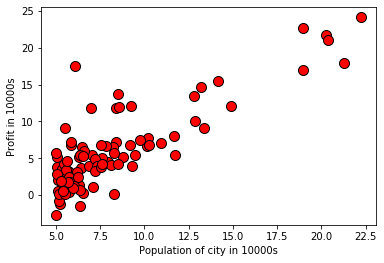

In [35]:
plotdata(X,y)

In [36]:
X = np.stack([np.ones(m), X], axis = 1)


In [37]:
def computeCost(X, y, theta):
    
    m = y.size
    
    J = 0
   
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J

In [38]:
J = computeCost(X, y, theta = np.array([0.0,0.0]))
print(J)

32.072733877455676


In [39]:
J = computeCost(X, y, theta = np.array([-1,2]))
print(J)

54.24245508201238


In [40]:
def gradientdescent(X, y, theta, alpha, num_iters):
    
    m = y.shape[0]
    
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        
        theta = theta - (alpha/m) * (np.dot(X, theta) - y).dot(X)
        
        J_history.append(computeCost(X, y, theta))
        
    return theta, J_history

In [41]:
theta = np.zeros(2)

num_iters = 1500

alpha = 0.01

theta, grad = gradientdescent(X, y, theta, alpha, num_iters)
print(theta)

[-3.63029144  1.16636235]


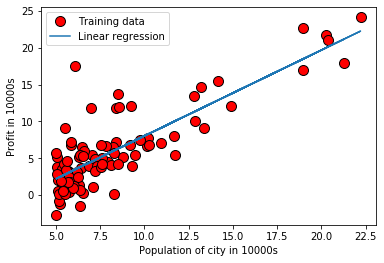

In [42]:
plotdata(X[:,1],y)
pyplot.plot(X[:, 1], np.dot(X,theta), '-')
pyplot.legend(['Training data', 'Linear regression'])

In [43]:
predict1 = np.dot([1, 3.5], theta)
print(predict1*10000)

4519.7678677017675


## Linear Regression with multiple variables

In [44]:
data2 = np.loadtxt(os.path.join('C:\Data\ex1', 'ex1data2.txt'), delimiter = ',')

X = data2[:,:2]
y = data2[:, 2]

m = y.size

In [45]:
def featurenormalize(X):
    
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    
    X_norm = (X-mu)/sigma 
    
    return X_norm, mu, sigma

In [46]:
X_norm, mu, sigma = featurenormalize(X)

print(mu)
print(sigma)

[2000.68085106    3.17021277]
[7.86202619e+02 7.52842809e-01]


In [47]:
X = np.concatenate([np.ones((m,1)), X_norm], axis = 1)

In [48]:
def computecostmulti(X, y, theta):
    
    J= 0
    m = y.size
    
    h = np.dot(X,theta)
    
    J = (1/(2*m)) * np.sum(np.square(h - y))
    
    return J

In [49]:
def gradientdescentmulti(X, y, theta, alpha, num_iters):
    
    theta = theta.copy()
    
    J_history = []
    
    m = y.size
    
    for i in range(num_iters):
        
        theta = theta - (alpha/m) * (np.dot(X,theta) - y).dot(X)
        
        J_history.append(computecostmulti(X, y, theta))
        
    return theta, J_history

[340412.65957447 109447.79558639  -6578.3539709 ]


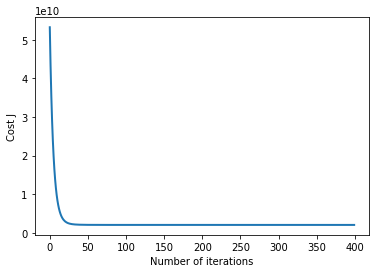

In [50]:
alpha = 0.1

iterations = 400

theta = np.zeros(3)

theta, J_history = gradientdescentmulti(X, y, theta, alpha, iterations)

pyplot.plot(np.arange(len(J_history)), J_history, lw = 2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

print(theta)

## Normal Equation

In [61]:
data = np.loadtxt(os.path.join('C:\Data\ex1', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

In [62]:
def featurenormalize(X):
    
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    
    X_norm = (X-mu)/sigma 
    
    return X_norm, mu, sigma

In [63]:
X = np.concatenate([np.ones((m,1)), X_norm], axis = 1)

In [64]:
def normalEqn(X, y):
    
    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [65]:
theta = normalEqn(X, y)

print(theta)

[340412.65957447 109447.79646964  -6578.35485416]


In [66]:
X_array = [1, 1650, 3]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta) # You should change this

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price))


Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $293081
